#Recursive Least Square Method

LS or WLS uses entire dataset to find the best estimate, whereas, we do not use the entire set of the data but use earlier calculated estimate and the additional data. 

## RLS Algorithm

**Step-1: Initialize the parameter and covariance estimates**:

----
Initial states, $\hat{\mathbf{x}}_0 = E\left[\mathbf{x}\right]$  

Initial state covariance matrix, $\mathbf{P}_0 = E\left[(\mathbf{x} - \hat{\mathbf{x}}_0)(\mathbf{x} - \hat{\mathbf{x}}_0)^T\right]$.  

**Step-2: Assume measurement model**:

----
$$\mathbf{y}_k = \mathbf{H}_k\mathbf{x}+\mathbf{v}_k$$

**Step-3: Calculate the gain matrix for every measurement k**:

----
  * Calculate the gain term: $$\mathbf{K}_k = \mathbf{P}_{k-1}\mathbf{H}_k^T\left(\mathbf{H}_k\mathbf{P}_{k-1}\mathbf{H}_k^T + \mathbf{R}_k\right)^{-1}$$   

**Step-4: Update estimate of the state $\mathbf{\hat{x}_k}$ and state covariance $\mathbf{P}_k$ for every measurement k**:

----
  * Update the state estimate: $$\hat{\mathbf{x}}_k = \hat{\mathbf{x}}_{k-1} + \mathbf{K}_k\left(\mathbf{y}_k - \mathbf{H}_k\hat{\mathbf{x}}_{k-1}\right)$$
  * Update the state covariance estimate: $$\mathbf{P}_k = \left(\mathbf{I} - \mathbf{K}_k\mathbf{H}_k\right)\mathbf{P}_{k-1}$$

## Example - RLS
----
Following data are collected at equal time interval

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |

Fit a measurement linear model $V = IR' + b$ using recursive LS and compare with batch solution. The voltage measurements are corrupted by additive, independent and identitically distributed zero-mean Gaussian noise with a standard deviation of $0.15~V$ (i.e., a variance of $0.0225 ~ V^2$). Assume $R'$ and $b$, follows a Gaussian or normal distribution with a mean of $4~\Omega$ and a standard deviation of $3~ \Omega$ for $R'$ and  a mean of $0~V$ and a variance of $0.2~V^{2}$ for $b$.

###Solution
The state matrix;
$\mathbf{x}=\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=\begin{bmatrix} R' \\ b \end{bmatrix}$.  

For the given noise in the parameters $R'$ and $b$; the sensor noise can be representated by the following:  

$$R' \sim \mathcal{N}(4, 9.0),~~b \sim \mathcal{N}(0, 0.2)$$

In this case, the initial parameter vector $\hat{\mathbf{x}}_0$ contains $R$ and $b$. 

### Python Code
----
As before, the first step is to import the neccesary Python modules and load the current values and voltage measurements into NumPy arrays:

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [ ]:
I = np.array([[0.2], [0.3], [0.4], [0.5], [0.6]])
V = np.array([[1.23, 1.38, 2.06, 2.47, 3.17]]).T
print("Current \n",I,"\nVoltage \n", V)

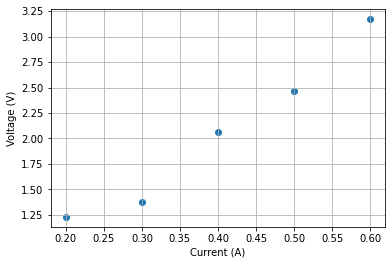

In [4]:
plt.scatter(I, V)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

The measurement covariance matrix, $\mathbf{R}=\begin{bmatrix} 0.0225 \end{bmatrix}$  

Let us take the mean values of the state parameters as the intial guess, so,  

$\mathbf{x}_{k=0}=\begin{bmatrix} 4 \\ 0 \end{bmatrix}$  

The initial state covariance matrix is given by

$\mathbf{P}_{k=0}=\begin{bmatrix} 9 & 0 \\ 0 & 0.2 \end{bmatrix}$  


In [ ]:
# Our voltage measurement variance (denoted by R, don't confuse with resistance).
R_k = np.array([[0.0225]])
print(R_k)
# Assume initial values of the state [2x1] R and b.
x0=np.array([[4.0], [0.0]])

#Assume initial Process Covariance matrix [2x2]. Off-diangonal be zeros.
P0=np.array([[9.0, 0], [0, 0.2]])
print("Initial State \n",x0,'\nInitial State covariance \n', P0)

In [ ]:
num_meas = I.shape[0] # Try I.shape
H_k=np.ones(2).reshape(1,2)
print(H_k.shape)
P_k=P0
x_k=x0

$\mathbf{K}_k = \mathbf{P}_{k-1}\mathbf{H}_k^T\left(\mathbf{H}_k\mathbf{P}_{k-1}\mathbf{H}_k^T + \mathbf{R}_k\right)^{-1}$

In [48]:
def update_gain(P,H,R):
  K=P_k.dot(H.T).dot(inv(H.dot(P.dot(H.T))+R))
  return K

$\hat{\mathbf{x}}_k = \hat{\mathbf{x}}_{k-1} + \mathbf{K}_k\left(\mathbf{y}_k - \mathbf{H}_k\hat{\mathbf{x}}_{k-1}\right)$  

$\mathbf{P}_k = \left(\mathbf{I} - \mathbf{K}_k\mathbf{H}_k\right)\mathbf{P}_{k-1}$

In [46]:
# Iterate over all the available measurements.
for k in range(num_meas):
    # Construct H_k (Jacobian).
    H_k[0][0] = I[k]
    #print("Hk",H_k, H_k.shape)

    # Construct K_k (gain matrix). 
    K_k=P_k.dot(H_k.T).dot(inv(H_k.dot(P_k.dot(H_k.T))+R_k))
    #print(K_k)
    
    # Update our estimate.
    x_k = x_k+K_k.dot(V[k]-H_k.dot(x_k))
 
    # Update uncertainty (covariance) of the Process/Model 
    P_k = K_k.dot(H_k)
    #print(P_k)
    
print('The slope and offset parameters of the best-fit line (i.e., the resistance and offset) are [R, b]:')
print(x_k)

(1, 2)
The slope and offset parameters of the best-fit line (i.e., the resistance and offset) are [R, b]:
[[5.07817134]
 [0.11979682]]


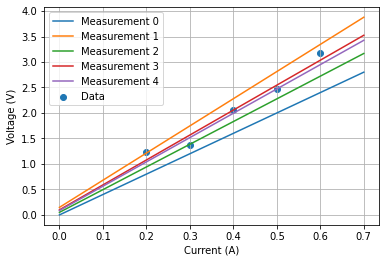

In [ ]:
plt.scatter(I, V, label='Data')
#plt.plot(I_line, V_line, label='Batch Solution')
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)

I_line = np.arange(0, 0.8, 0.1).reshape(8, 1)

for k in range(num_meas):
    V_line = x[k, 0]*I_line + x[k, 1]
    plt.plot(I_line, V_line, label='Measurement {}'.format(k))
plt.legend()
plt.show()